In [5]:
import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
display(df.info())
display(df.describe(include='all').T)
# Show missing values
print("\nMissing values per column:\n", df.isnull().sum())
# Value counts for categorical columns (example)
for col in df.select_dtypes(include='object').columns:
    print(f"\n--- {col} value counts ---")
    print(df[col].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race/ethnicity,1000,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental level of education,1000,6,some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test preparation course,1000,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math score,1000.0,NaN,NaN,NaN,66.089,15.16308,0.0,57.0,66.0,77.0,100.0
reading score,1000.0,NaN,NaN,NaN,69.169,14.600192,17.0,59.0,70.0,79.0,100.0
writing score,1000.0,NaN,NaN,NaN,68.054,15.195657,10.0,57.75,69.0,79.0,100.0



Missing values per column:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

--- gender value counts ---
gender
female    518
male      482
Name: count, dtype: int64

--- race/ethnicity value counts ---
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

--- parental level of education value counts ---
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

--- lunch value counts ---
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

--- test preparation course value counts ---
test preparation course
none         642
comp

In [8]:
df['pass_math'] = (df['math score'] >= 60).astype(int)  # 1 = pass, 0 = fail

X = df.drop(['math score', 'reading score', 'writing score', 'pass_math'], axis=1)
y = df['pass_math']

print("Feature columns:", X.columns.tolist())
print("Class distribution:\n", y.value_counts(normalize=False))


Feature columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
Class distribution:
 pass_math
1    677
0    323
Name: count, dtype: int64


In [9]:
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first avoids dummy trap
print("Encoded shape:", X_encoded.shape)
X_encoded.head()


Encoded shape: (1000, 12)


,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,False,True,False,False,False,True,False,False,False,False,True,True
1,False,False,True,False,False,False,False,False,True,False,True,False
2,False,True,False,False,False,False,False,True,False,False,True,True
3,True,False,False,False,False,False,False,False,False,False,False,True
4,True,False,True,False,False,False,False,False,True,False,True,True


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train class distribution:\n", y_train.value_counts(normalize=True))


Train shape: (800, 12) Test shape: (200, 12)
Train class distribution:
 pass_math
1    0.6775
0    0.3225
Name: proportion, dtype: float64


In [12]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)


In [13]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree (no limit) Accuracy:", round(acc_tree,4))


Decision Tree (no limit) Accuracy: 0.62


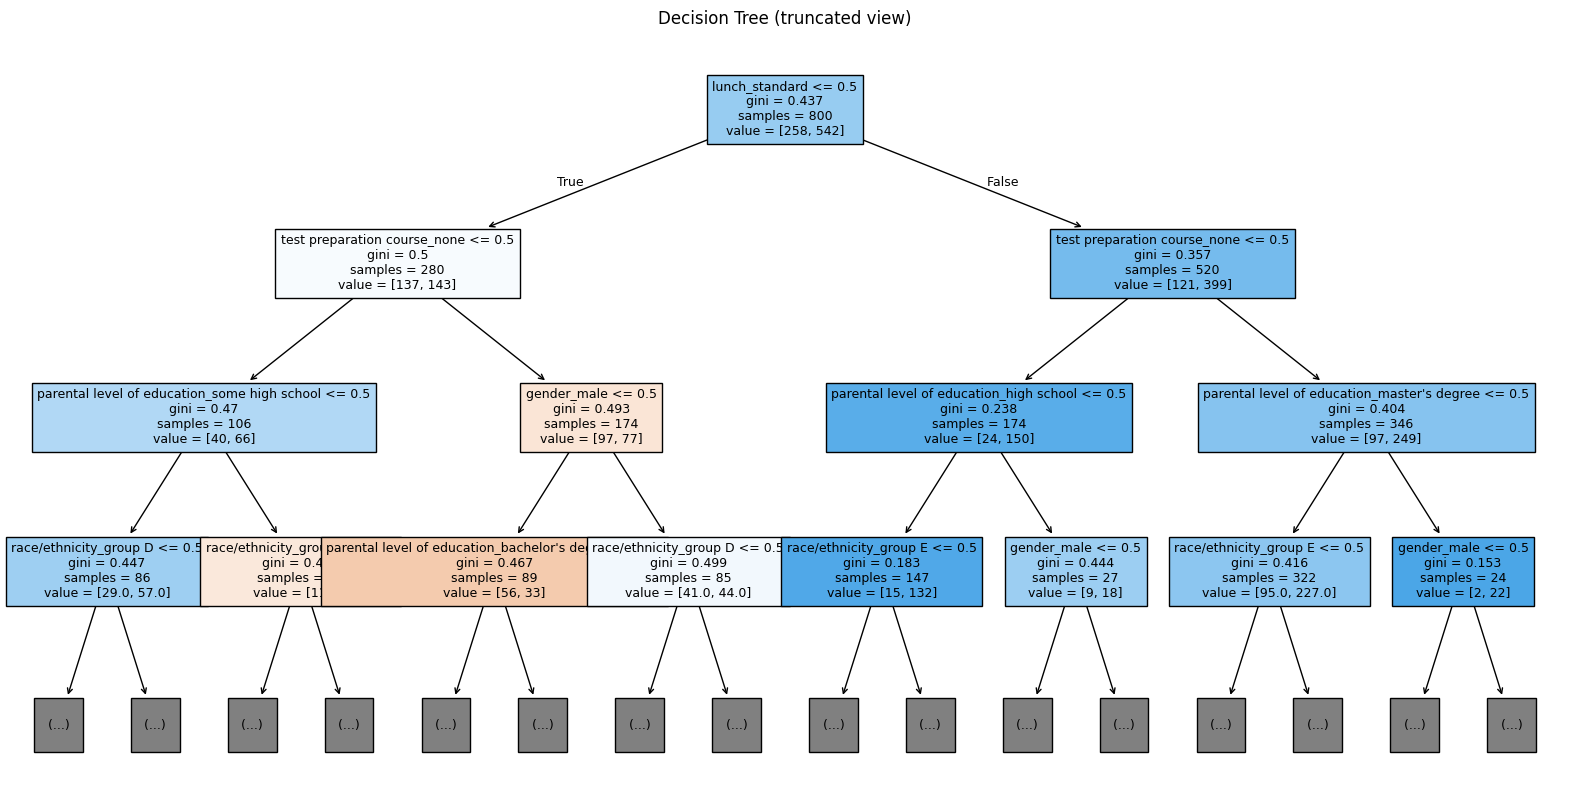

In [14]:
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X_train.columns, filled=True, max_depth=3, fontsize=9)
plt.title("Decision Tree (truncated view)")
plt.show()


In [15]:
depths = [2, 3, 4, 5, 6, None]  # None => unlimited
results = []
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    results.append((d, acc))
    
import pandas as pd
pd.DataFrame(results, columns=['max_depth','test_accuracy']).set_index('max_depth')


,test_accuracy
max_depth,
2.0,0.665
3.0,0.720
4.0,0.690
5.0,0.720
6.0,0.695
NaN,0.620


In [16]:
best_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
best_tree.fit(X_train, y_train)
y_pred_best_tree = best_tree.predict(X_test)
print("Best Tree Accuracy:", round(accuracy_score(y_test, y_pred_best_tree),4))


Best Tree Accuracy: 0.69


In [17]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", round(acc_rf,4))


Random Forest Accuracy: 0.67


Decision Tree (best depth) report:
              precision    recall  f1-score   support

           0       0.54      0.34      0.42        65
           1       0.73      0.86      0.79       135

    accuracy                           0.69       200
   macro avg       0.63      0.60      0.60       200
weighted avg       0.67      0.69      0.67       200


Random Forest report:
              precision    recall  f1-score   support

           0       0.49      0.31      0.38        65
           1       0.72      0.84      0.78       135

    accuracy                           0.67       200
   macro avg       0.60      0.58      0.58       200
weighted avg       0.64      0.67      0.65       200



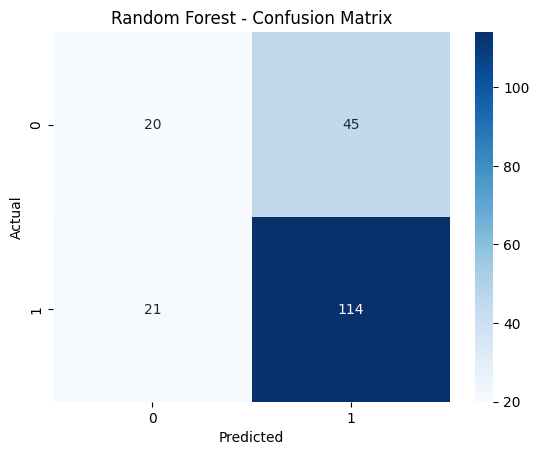

In [18]:
print("Decision Tree (best depth) report:")
print(classification_report(y_test, y_pred_best_tree))

print("\nRandom Forest report:")
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


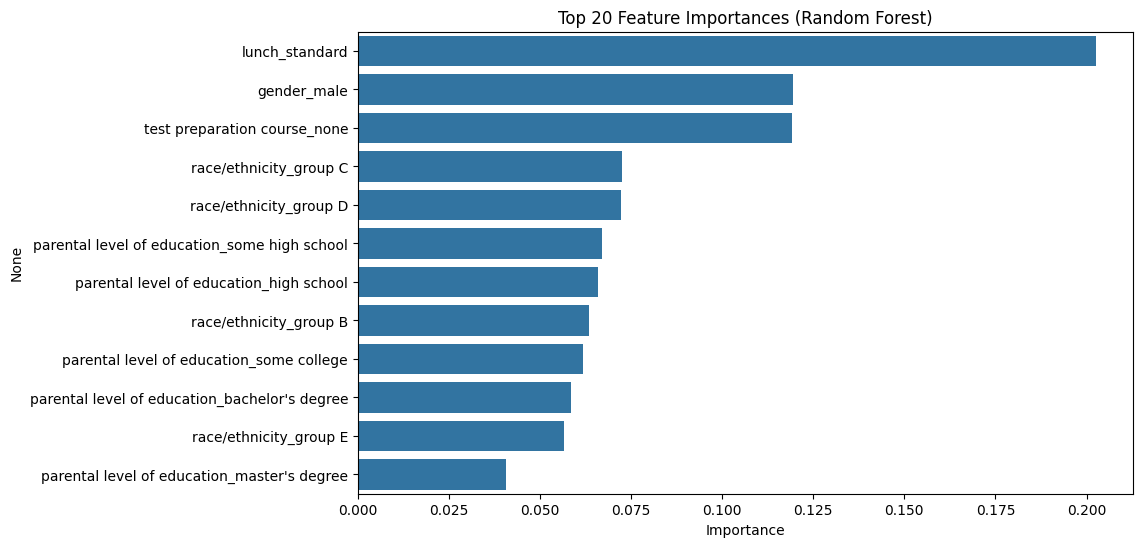

In [19]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances.values[:20], y=importances.index[:20])  # top 20
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.show()
